# **Working with Text Data - Preprocessing and Text to Numerical Vector**

## 1. Importing the required libraries and Data Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Colab Notebooks/data/review_data.csv')
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Id
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1
2,B000LQOCH0,ABXLMWJIXXAIN,Natalia Corres Natalia Corres,1,1,4,1219017600,Delight says it all,This is a confection that has been around a fe...,2
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,3
4,B006K2ZZ7K,A1UQRSCLF8GW1T,Michael D. Bigham M. Wassir,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wide...,4


In [ ]:
!pip install nltk #installing Natural Language Tool kit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords') # downloading the stopwords, this is available in nltk.corpus, which is not already dowloaded we have to manually download it.
# Downloading wordnet before applying Lemmatizer
nltk.download('wordnet') # this is used to apply lemmatizer, as it contains all the human redable words.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Regx
import re 

# importing Tokenisation and stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Stemming and Lemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

## 2. Text Preprocessing   

1.   Removing special characters
2.   Convert sentence into lower case
3.   Tokenisation
4.   Removing stop words
5.   Stemming or Lemmatization

In [ ]:
# initialise the in-built stemmer
stemmer = PorterStemmer()

# alternative way Lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocess(raw_text, flag):
  # removing special characters and digits
  sentence = re.sub('[^a-zA-Z]',' ', raw_text) 

  # change sentence to lower case
  sentence = sentence.lower()

  # tokenize into words
  tokens = sentence.split()

  # remove stop words
  clean_tokens = [t for t in tokens if not t in stopwords.words('english')] 

  # Stemming/lemmatization
  if (flag == 'stem'):
    clean_tokens = [stemmer.stem(word) for word in clean_tokens]
  else:
    clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]

  return pd.Series([' '.join(clean_tokens)])

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tqdm import tqdm, tqdm_notebook

In [ ]:
tqdm.pandas()

In [ ]:
#temp_df = df['ReviewText'].progress_apply(lambda x : preprocess(x, 'lemm'))

#temp_df.head()

In [ ]:
#temp_df = df['ReviewText'].apply(lambda x : preprocess(x, 'lemm'))

#temp_df.head()

In [ ]:
#temp_df.columns = ['clean_text_lemma']

#temp_df.head()

In [ ]:
#df = pd.concat([temp_df,df['Score']], axis=1)

#df.head()

In [ ]:
#df.loc[df['Score']<3, 'Score'] = 0
#df.loc[df['Score']>3, 'Score'] = 1
#df=df[df.Score!=3]

In [ ]:
#df.head()

In [ ]:
#df.to_csv('/content/drive/MyDrive/Data Science/Colab Notebooks/data/review_data_cleaned_1.csv', index=False)

## 3.Splitting the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Colab Notebooks/data/review_data_cleaned_1.csv')
df.head()

,clean_text_lemma,Score
0,bought several vitality canned dog food produc...,1
1,product arrived labeled jumbo salted peanut pe...,0
2,confection around century light pillowy citrus...,1
3,looking secret ingredient robitussin believe f...,0
4,great taffy great price wide assortment yummy ...,1


In [ ]:
df['clean_text_lemma'].isnull().sum()

1

In [ ]:
df.shape

(525814, 2)

In [ ]:
df = df[pd.notnull(df['clean_text_lemma'])]

In [ ]:
df.shape

(525813, 2)

In [ ]:
X = df[['clean_text_lemma']]
y = df['Score']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
X_train.head()

,clean_text_lemma
184290,year past grocery store carried brown bread al...
266565,like reviewer noted never eat soy lecithin des...
150742,got talking one friend healthy product benefit...
174377,really enjoy hi chew except mango happy see of...
4483,family love tasty healthy sesame honey almond ...


In [ ]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((368069, 1), (157744, 1), (368069,), (157744,))

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368069 entries, 184290 to 56088
Data columns (total 1 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   clean_text_lemma  368069 non-null  object
dtypes: object(1)
memory usage: 5.6+ MB


## 4. Converting Text to Numerical vectors - BOW Representation

1.   Vocabulary
2.   Document term matrix



In [ ]:
X_train['clean_text_lemma'].head()

184290    year past grocery store carried brown bread al...
266565    like reviewer noted never eat soy lecithin des...
150742    got talking one friend healthy product benefit...
174377    really enjoy hi chew except mango happy see of...
4483      family love tasty healthy sesame honey almond ...
Name: clean_text_lemma, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer # BOW is present in the CountVectorizer

BOW_vocab = CountVectorizer()

X_train_BOW = BOW_vocab.fit_transform(X_train['clean_text_lemma']) #constructing the document term matrix, this dtm is in the form of sparse but not in dataframe. sparse: only contains 1 ignores 0 

In [ ]:
X_train_BOW.shape

(368069, 85055)

In [ ]:
type(X_train_BOW)

scipy.sparse.csr.csr_matrix

In [ ]:
#X_train_BOW = pd.DataFrame(X_train_BOW.toarray(), columns = sorted(BOW_vocab.vocabulary_))
#X_train_BOW

In [ ]:
# **2-grams**
#vocab = CountVectorizer(ngram_range=[1,2])

#X_train_BOW_bigram = vocab.fit_transform(df.clean_text_lemma)

# X_train_BOW_bigram = pd.DataFrame(dtX_train_BOW_bigram.toarray(), columns = sorted(vocab.vocabulary_))

In [ ]:
X_test_BOW = BOW_vocab.transform(X_test['clean_text_lemma'])

# X_test_BOW = pd.DataFrame(X_test_BOW.toarray(), columns = sorted(BOW_vocab.vocabulary_))

In [ ]:
#X_test_BOW_bigram = BOW_vocab.transform(X_test['clean_text_lemma'])

In [ ]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((368069, 1), (157744, 1), (368069,), (157744,))

In [ ]:
X_train_BOW.shape, X_test_BOW.shape

((368069, 85055), (157744, 85055))

# **Machine Learning Model**

## 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
tuned_parameters = [{'penalty' : ['l1','l2', 'elasticnet'],
                    'solver' : ['saga'],
                     'C' : [0.001,0.01,0.1, 1, 10, 100]}]

lr_rs = RandomizedSearchCV(
    estimator=LogisticRegression(), 
    param_distributions=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=3
)


lr_rs.fit(X_train_BOW, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=100, penalty=elasticnet, solver=saga;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=100, penalty=elasticnet, solver=saga;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=100, penalty=elasticnet, solver=saga;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=100, penalty=elasticnet, solver=saga;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=100, penalty=elasticnet, solver=saga;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=0.1, penalty=elasticnet, solver=saga;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=0.1, penalty=elasticnet, solver=saga;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=0.1, penalty=elasticnet, solver=saga;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=0.1, penalty=elasticnet, solver=saga;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=0.1, penalty=el

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                         'penalty': ['l1', 'l2', 'elasticnet'],
                                         'solver': ['saga']}],
                   return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
print("Best parameters set found on train set:")
print(lr_rs.best_params_)
print(lr_rs.best_estimator_)
print()

print('Score on Test Data: ', lr_rs.score(X_test_BOW, y_test))

Best parameters set found on train set:
{'solver': 'saga', 'penalty': 'l2', 'C': 100}
LogisticRegression(C=100, solver='saga')

Score on Test Data:  0.9259369611522467


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2', solver='saga', C=0.1)
classifier.fit(X_train_BOW, y_train)

LogisticRegression(C=0.1, solver='saga')

In [ ]:
y_test_pred = classifier.predict(X_test_BOW)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.9254107921695912
              precision    recall  f1-score   support

           0       0.83      0.66      0.73     24637
           1       0.94      0.98      0.96    133107

    accuracy                           0.93    157744
   macro avg       0.88      0.82      0.84    157744
weighted avg       0.92      0.93      0.92    157744



## 2. Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
tuned_parameters = [{'alpha': [0.1, 1, 10, 100, 1000]}]

sv_rs = RandomizedSearchCV(
    estimator=MultinomialNB(), 
    param_distributions=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=3
)

sv_rs.fit(X_train_BOW, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .....alpha=0.1;, score=(train=0.924, test=0.910) total time=   0.2s
[CV 2/5] END .....alpha=0.1;, score=(train=0.924, test=0.909) total time=   0.2s
[CV 3/5] END .....alpha=0.1;, score=(train=0.924, test=0.908) total time=   0.2s
[CV 4/5] END .....alpha=0.1;, score=(train=0.925, test=0.910) total time=   0.2s
[CV 5/5] END .....alpha=0.1;, score=(train=0.924, test=0.909) total time=   0.2s
[CV 1/5] END .......alpha=1;, score=(train=0.918, test=0.909) total time=   0.2s
[CV 2/5] END .......alpha=1;, score=(train=0.918, test=0.909) total time=   0.2s
[CV 3/5] END .......alpha=1;, score=(train=0.919, test=0.907) total time=   0.2s
[CV 4/5] END .......alpha=1;, score=(train=0.918, test=0.909) total time=   0.2s
[CV 5/5] END .......alpha=1;, score=(train=0.918, test=0.909) total time=   0.2s
[CV 1/5] END ......alpha=10;, score=(train=0.884, test=0.882) total time=   0.2s
[CV 2/5] END ......alpha=10;, score=(train=0.885,

RandomizedSearchCV(cv=5, estimator=MultinomialNB(),
                   param_distributions=[{'alpha': [0.1, 1, 10, 100, 1000]}],
                   return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
print("Best parameters set found on train set:")
print(sv_rs.best_params_)
print(sv_rs.best_estimator_)
print()

print('Score on Test Data: ', sv_rs.score(X_test_BOW, y_test))

Best parameters set found on train set:
{'alpha': 0.1}
MultinomialNB(alpha=0.1)

Score on Test Data:  0.9111408357845623


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.9101962673699158
              precision    recall  f1-score   support

           0       0.72      0.70      0.71     24637
           1       0.94      0.95      0.95    133107

    accuracy                           0.91    157744
   macro avg       0.83      0.82      0.83    157744
weighted avg       0.91      0.91      0.91    157744



## 3. Decision Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tuned_parameters = {'criterion' : ['gini','entropy'],
                    'max_depth' : [1,2,3,4,5]}

dt_rs = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(), 
    param_distributions=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=3
)

dt_rs.fit(X_train_BOW, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=1;, score=(train=0.844, test=0.843) total time=  11.7s
[CV 2/5] END criterion=gini, max_depth=1;, score=(train=0.844, test=0.844) total time=  11.7s
[CV 3/5] END criterion=gini, max_depth=1;, score=(train=0.844, test=0.844) total time=  11.5s
[CV 4/5] END criterion=gini, max_depth=1;, score=(train=0.844, test=0.844) total time=  11.5s
[CV 5/5] END criterion=gini, max_depth=1;, score=(train=0.844, test=0.845) total time=  11.6s
[CV 1/5] END criterion=gini, max_depth=2;, score=(train=0.850, test=0.849) total time=  11.8s
[CV 2/5] END criterion=gini, max_depth=2;, score=(train=0.850, test=0.850) total time=  12.1s
[CV 3/5] END criterion=gini, max_depth=2;, score=(train=0.850, test=0.850) total time=  12.0s
[CV 4/5] END criterion=gini, max_depth=2;, score=(train=0.850, test=0.850) total time=  12.0s
[CV 5/5] END criterion=gini, max_depth=2;, score=(train=0.846, test=0.847) total time=  12.0s

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5]},
                   return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
print("Best parameters set found on train set:")
print(dt_rs.best_params_)
print(dt_rs.best_estimator_)
print()

print('Score on Test Data: ', dt_rs.score(X_test_BOW, y_test))

Best parameters set found on train set:
{'max_depth': 5, 'criterion': 'gini'}
DecisionTreeClassifier(max_depth=5)

Score on Test Data:  0.8534524292524597


## 4. Random Forest 

### Tunning Max_depth

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

hyper_parameters = [{'max_depth': range(2, 20, 5)}]

rf = RandomForestClassifier()

# fit tree on training data
tunned_model_rf = GridSearchCV(
                      estimator=rf, 
                      param_grid=hyper_parameters,
                      cv=5, 
                      scoring="accuracy",
                      return_train_score=True,
                      verbose=1
)

tunned_model_rf.fit(X_train_BOW, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': range(2, 20, 5)}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
print("Best parameters set found on train set:")
print(tunned_model_rf.best_params_)
print(tunned_model_rf.best_estimator_)
print()

print('Score on Test Data: ', tunned_model_rf.score(X_test_BOW, y_test))

Best parameters set found on train set:
{'max_depth': 17}
RandomForestClassifier(max_depth=17)

Score on Test Data:  0.8445582716299828


In [ ]:
cv_results = pd.DataFrame(tunned_model_rf.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,10.216722,0.082440,1.154497,0.011558,2,{'max_depth': 2},0.844051,0.844051,0.844051,0.844051,...,0.844051,8.473970e-07,4,0.844051,0.844051,0.844051,0.844051,0.844051,0.844051,2.118471e-07
1,29.571218,0.365427,1.210476,0.021165,7,{'max_depth': 7},0.844296,0.844432,0.844473,0.844391,...,0.844412,6.538888e-05,3,0.844441,0.844407,0.844397,0.844418,0.844398,0.844412,1.634723e-05
2,50.387302,0.406327,1.206343,0.014618,12,{'max_depth': 12},0.844310,0.844445,0.844500,0.844405,...,0.844431,7.044629e-05,2,0.844513,0.844452,0.844438,0.844438,0.844456,0.844459,2.769215e-05
3,73.637005,0.432396,1.331809,0.007301,17,{'max_depth': 17},0.844595,0.844663,0.844744,0.844785,...,0.844708,6.982461e-05,1,0.844849,0.844829,0.844852,0.844910,0.844839,0.844856,2.835158e-05


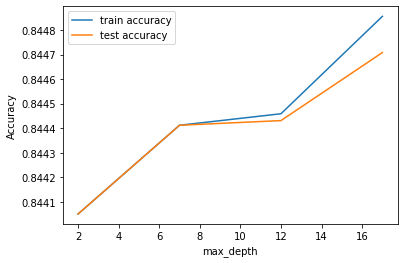

In [ ]:
plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend(['train accuracy', 'test accuracy'], loc='upper left')

### Tunning n_estimator

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

n_folds = 5

hyper_parameters = [{'n_estimators': [3, 5, 10, 50, 100]}]

rf = RandomForestClassifier()

# fit tree on training data
tunned_model_rf = GridSearchCV(
                      estimator=rf, 
                      param_grid=hyper_parameters,
                      cv=n_folds, 
                      scoring="accuracy",
                      return_train_score=True,
                      verbose=3,
                      n_jobs=-1
)

tunned_model_rf.fit(X_train_BOW, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'n_estimators': [3, 5, 10, 50, 100]}],
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
print("Best parameters set found on train set")
print(tunned_model_rf.best_params_)
print(tunned_model_rf.best_estimator_)
print()

print('Score on Test Data: ', tunned_model_rf.score(X_test_BOW, y_test))

Best parameters set found on train set
{'n_estimators': 50}
RandomForestClassifier(n_estimators=50)

Score on Test Data:  0.9275091287148798


In [ ]:
cv_results = pd.DataFrame(tunned_model_rf.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,98.738747,12.082395,0.413685,0.018084,3,{'n_estimators': 3},0.902899,0.903211,0.904420,0.902002,...,0.903341,0.000879,5,0.982018,0.981797,0.981793,0.981563,0.981172,0.981669,0.000287
1,173.822577,10.654308,0.578067,0.019075,5,{'n_estimators': 5},0.914079,0.913834,0.914323,0.915641,...,0.914521,0.000633,4,0.989927,0.989564,0.989829,0.989479,0.989686,0.989697,0.000165
2,289.898276,9.252179,1.010059,0.020841,10,{'n_estimators': 10},0.922338,0.922501,0.923900,0.926604,...,0.923800,0.001531,2,0.997772,0.997823,0.997718,0.997796,0.997816,0.997785,0.000038
3,1285.707316,9.616004,4.520917,0.068362,50,{'n_estimators': 50},0.922596,0.923955,0.924566,0.925340,...,0.924169,0.000905,1,0.999925,0.999939,0.999939,0.999915,0.999946,0.999933,0.000011
4,2407.058060,23.583533,7.971450,0.115164,100,{'n_estimators': 100},0.921713,0.923072,0.922800,0.923900,...,0.922895,0.000701,3,0.999980,0.999983,0.999983,0.999976,0.999980,0.999980,0.000003


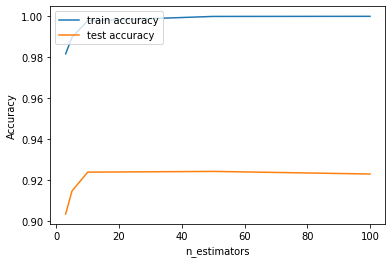

In [ ]:
plt.plot(cv_results['param_n_estimators'], cv_results['mean_train_score'])
plt.plot(cv_results['param_n_estimators'], cv_results['mean_test_score'])
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend(['train accuracy', 'test accuracy'], loc='upper left')

### Using the above best parameters (max_depth, n_estimator) to build a best fit model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(max_depth=17,
                                  n_estimators=50)

model_rf.fit(X_train_BOW, y_train)

RandomForestClassifier(max_depth=17, n_estimators=50)

In [ ]:
predictions = model_rf.predict(X_test_BOW)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('*'*10, 'Accuracy', '*'*10)
print(accuracy_score(y_test,predictions))
print()

print('*'*10, 'Conf Matrix', '*'*10)
print(confusion_matrix(y_test,predictions))
print()

print('*'*10, 'Class Report', '*'*10)
print(classification_report(y_test,predictions))
print()

********** Accuracy **********
0.8446597017953139

********** Conf Matrix **********
[[   133  24504]
 [     0 133107]]

********** Class Report **********
              precision    recall  f1-score   support

           0       1.00      0.01      0.01     24637
           1       0.84      1.00      0.92    133107

    accuracy                           0.84    157744
   macro avg       0.92      0.50      0.46    157744
weighted avg       0.87      0.84      0.77    157744


